In [2]:
#Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Connect to database
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
#Reflect tables into classes and save a reference to those classes
base = automap_base()
base.prepare(engine, reflect=True)

In [5]:
#Reflect database into ORM classes
Station = base.classes.station
Measurements = base.classes.measurements

In [6]:
session = Session(bind=engine)

# Precipitation Analysis

In [7]:
#Find date of last entry
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(last_date)

('2017-08-23',)


In [8]:
#Get last 12 months of data from last entry
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [9]:
#Pull the last year of rain data - date and pcrp values only
rain = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > last_year).order_by(Measurements.date).all()

In [10]:
#Load data into dataframe
rain_df = pd.DataFrame(rain)
rain_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15
5,2016-08-24,1.45
6,2016-08-25,0.08
7,2016-08-25,0.08
8,2016-08-25,0.00
9,2016-08-25,0.00


In [11]:
#Set index to date for plotting
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


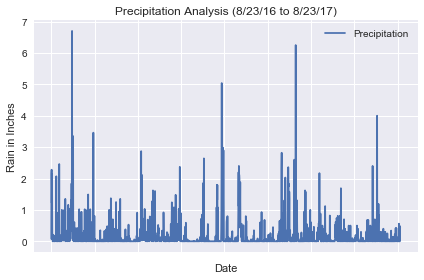

In [12]:
#Plot the dataframe
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('precipitation.png')
plt.show()

In [13]:
#Print the summary statistics for the precipitation data.
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000




# Station Analysis



In [14]:
#Query to calculate the total number of stations
locations = session.query(Measurements).group_by(Measurements.station).count()
print("Total Stations: {}".format(locations))

Total Stations: 9


In [15]:
#Query to find most active stations
busy_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()

busiest = busy_station[0][0]    

In [16]:
#Print stations and observation counts in descending order
print("The busiest Station was",busiest,"with",busy_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
    print("Station",station,"had",count,"weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00513117 had 2696 weather observations.
Station USC00519397 had 2685 weather observations.
Station USC00519523 had 2572 weather observations.
Station USC00516128 had 2484 weather observations.
Station USC00514830 had 1937 weather observations.
Station USC00511918 had 1932 weather observations.
Station USC00517948 had 683 weather observations.
Station USC00518838 had 342 weather observations.


In [17]:
#Design query to retrieve last 12 months temperature observation data
#Filter by number of observations
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == busiest).filter(Measurements.date > last_year).order_by(Measurements.date).all()

In [18]:
#Print station with highest number of observations
print("Station",busiest,"has the highest number of observations at",count)

Station USC00519281 has the highest number of observations at 342


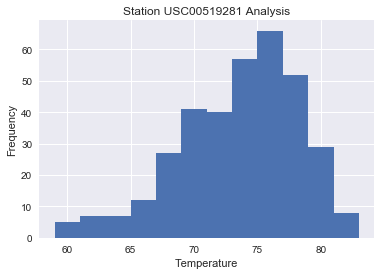

In [19]:
#Plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station " + busiest + " Analysis")
plt.savefig('station_analysis.png')
plt.show()

# Temperature Analysis


In [20]:
#Write function that will accept start and end dates in %Y-%m-%d format and return data for that date range
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

In [21]:
#Calculate the min, avg, and max temperatures for trip dates from the previous year and print
temp_range = (calc_temps('2016-05-21', '2016-05-29'))
print(temp_range)

[(69, 75.85416666666667, 81)]


In [22]:
#Save variables for min, max and average temps
trip_start = dt.date(2017, 5, 21)
trip_end = dt.date(2017, 5, 29)
last_year = dt.timedelta(days=365)
avg_temp = (calc_temps((trip_start-last_year), (trip_end-last_year)))

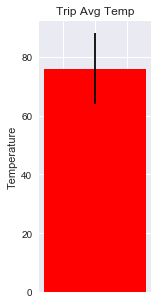

In [25]:
#Plot bar chart
peak_to_peak = avg_temp[0][2]-avg_temp[0][0]
average = avg_temp[0][1]
min_temp = avg_temp[0][0]
max_temp = avg_temp[0][2]

fig, ax = plt.subplots(figsize=(2, 5))
bar_chart = ax.bar(0, average, color= 'red', yerr=peak_to_peak)
ax.set_ylabel("Temperature")
ax.set_title("Trip Avg Temp")

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)

plt.savefig('temperature_avg.png')
plt.show()